In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')


In [24]:
train_data.shape

(891, 12)

In [25]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [26]:
train_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [27]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [28]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


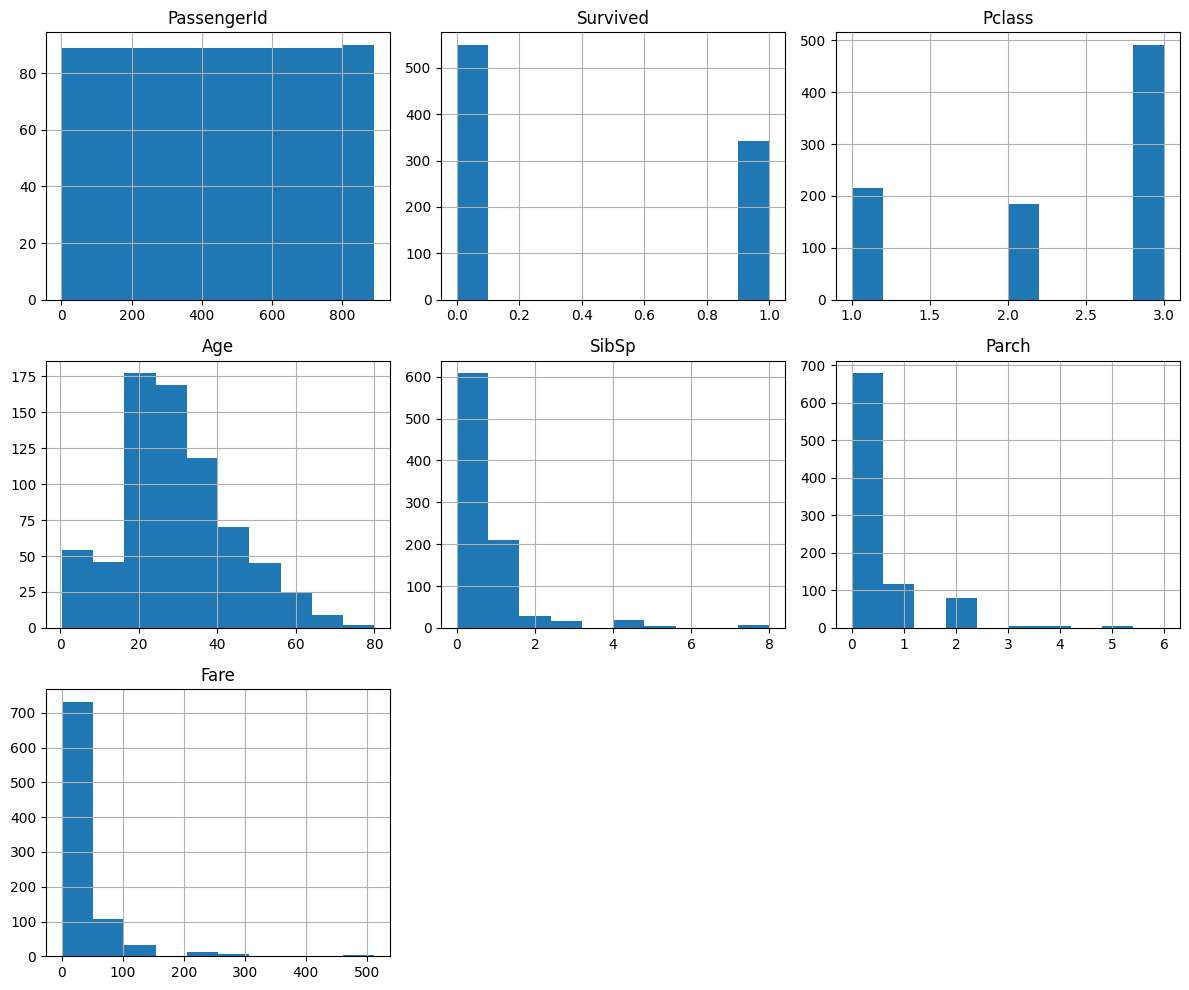

In [29]:
train_data.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

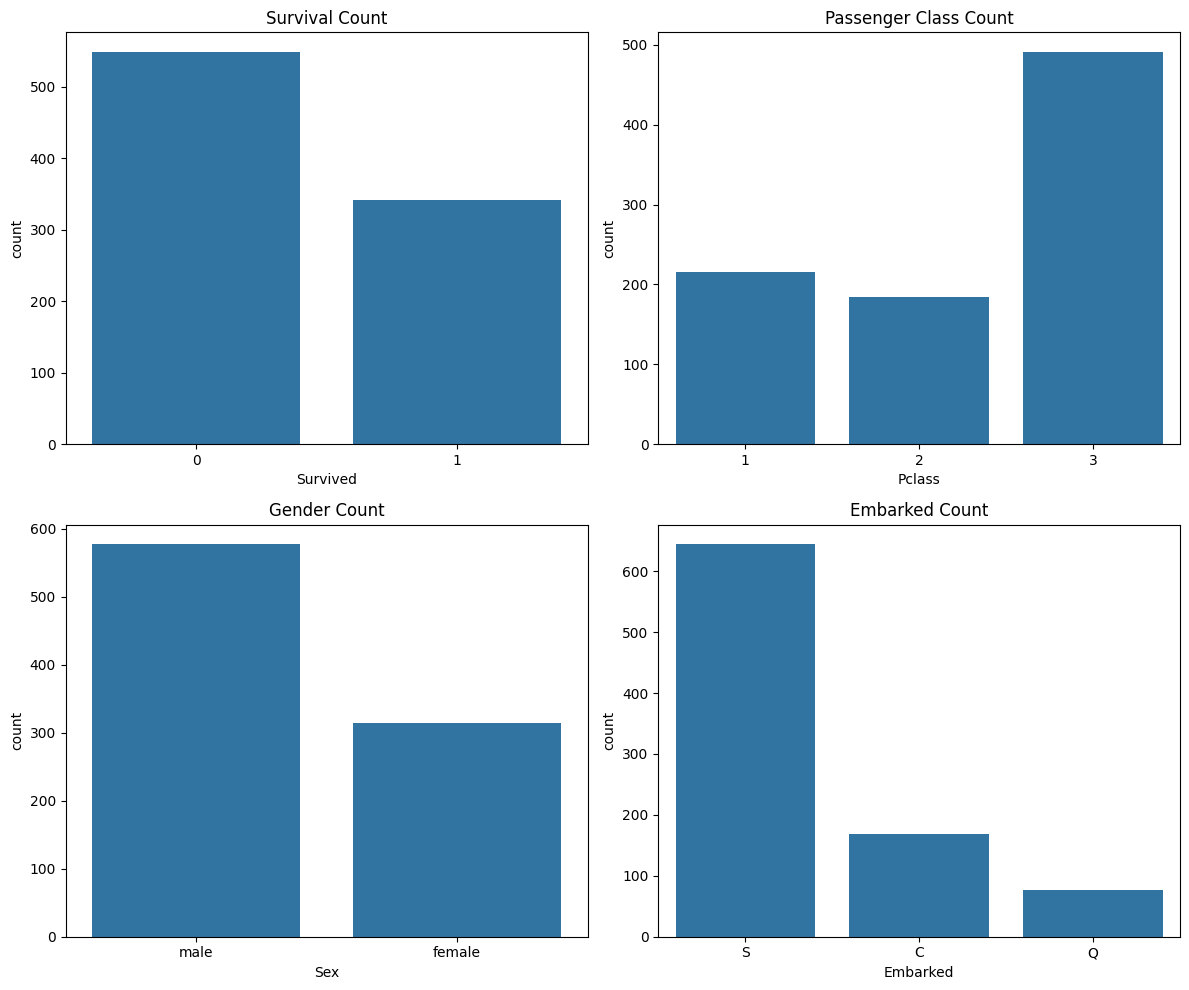

In [30]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.countplot(x='Survived', data=train_data, ax=axes[0, 0])
axes[0, 0].set_title('Survival Count')

sns.countplot(x='Pclass', data=train_data, ax=axes[0, 1])
axes[0, 1].set_title('Passenger Class Count')

sns.countplot(x='Sex', data=train_data, ax=axes[1, 0])
axes[1, 0].set_title('Gender Count')

sns.countplot(x='Embarked', data=train_data, ax=axes[1, 1])
axes[1, 1].set_title('Embarked Count')

plt.tight_layout()
plt.show()

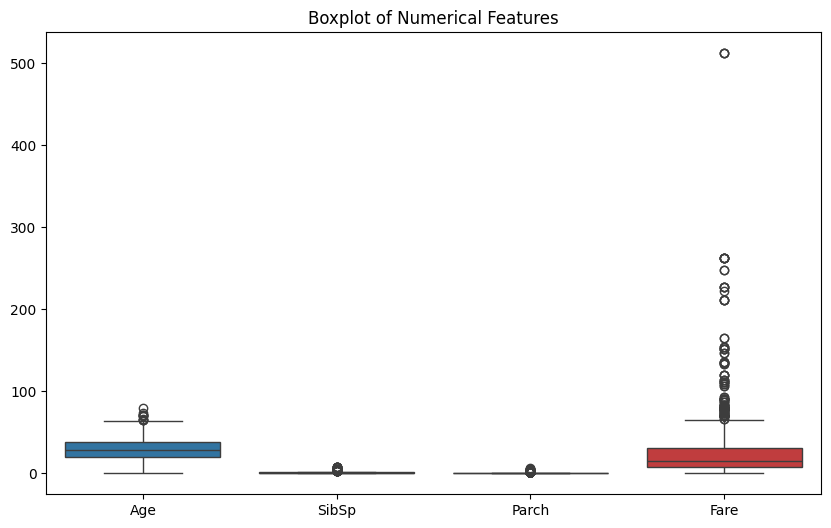

In [31]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_data.drop(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Embarked'], axis=1))
plt.title('Boxplot of Numerical Features')
plt.show()

In [35]:
mixed_data_cols_train = train_data.select_dtypes(include=['object']).columns.tolist()
mixed_data_cols_test = test_data.select_dtypes(include=['object']).columns.tolist()

print("Columns with mixed data types in train_data:", mixed_data_cols_train)
print("Columns with mixed data types in test_data:", mixed_data_cols_test)

Columns with mixed data types in train_data: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
Columns with mixed data types in test_data: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


In [36]:

train_data['Sex'] = train_data['Sex'].map({'male': 0, 'female': 1})
test_data['Sex'] = test_data['Sex'].map({'male': 0, 'female': 1})

In [37]:
train_data['Embarked'] = train_data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
test_data['Embarked'] = test_data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [45]:
train_data.drop(['Ticket', 'Cabin'], axis=1, inplace=True)


In [47]:
X_train = train_data.drop(['PassengerId', 'Survived'], axis=1)
y_train = train_data['Survived']


In [48]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [49]:
y_pred = model.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
conf_matrix = confusion_matrix(y_train, y_pred)

In [51]:
print("Accuracy:", accuracy)


Accuracy: 0.9820426487093153


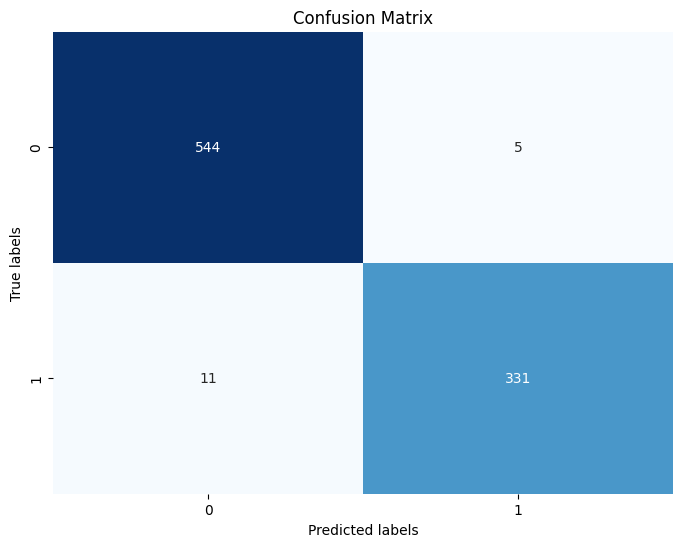

In [52]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

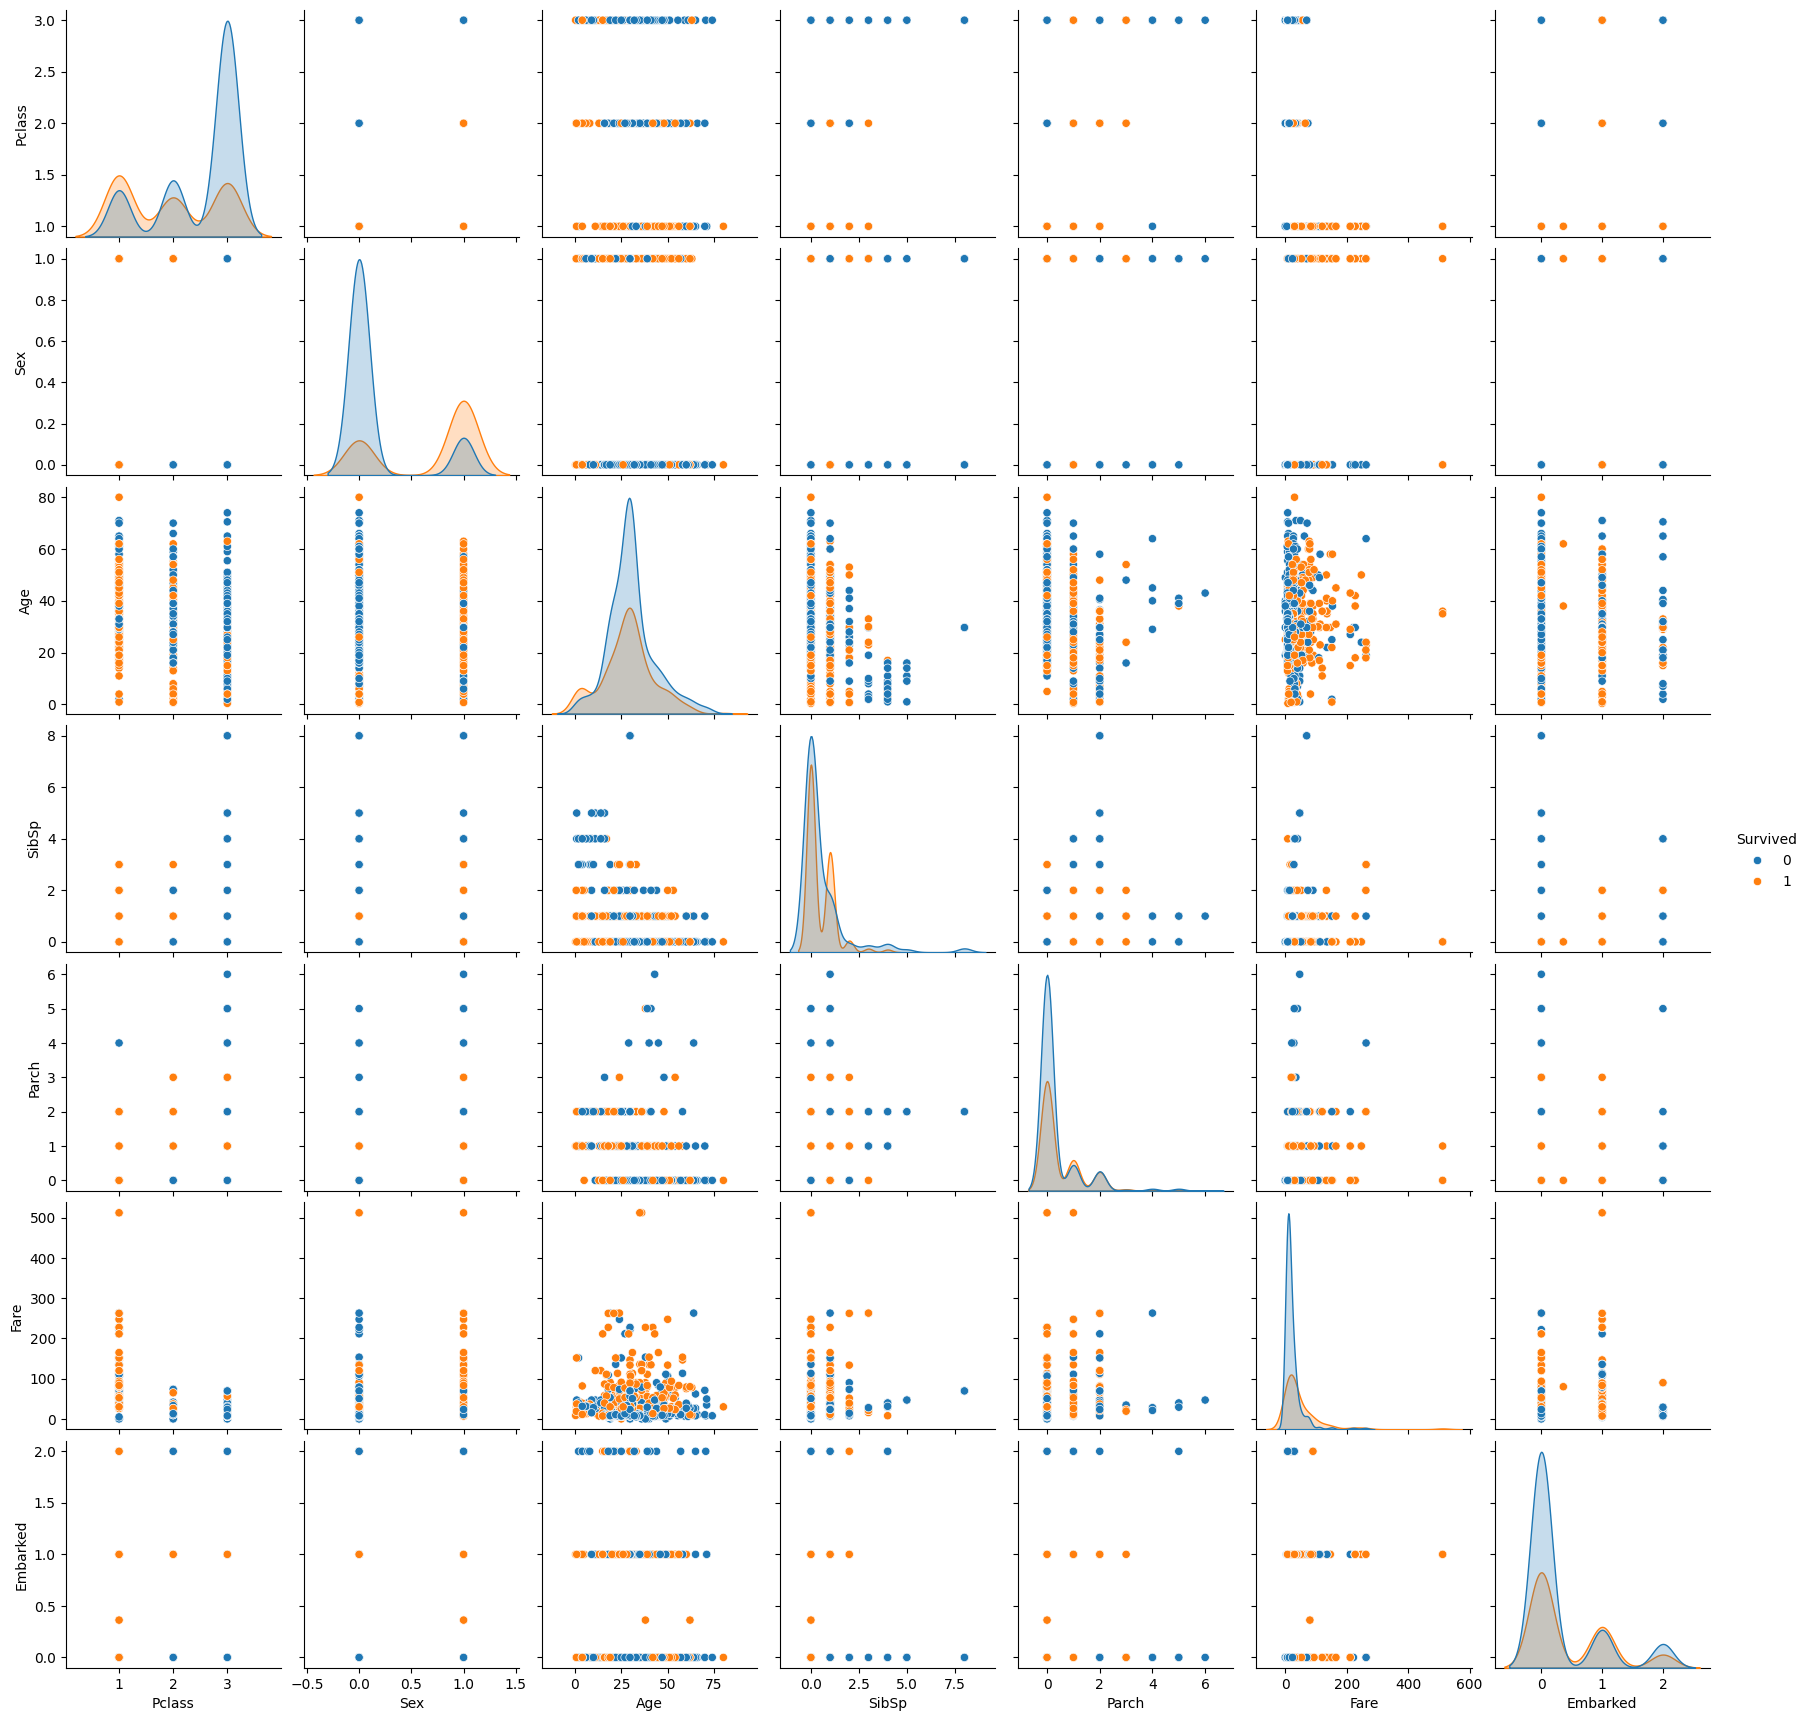

In [54]:
sns.pairplot(train_data.drop(['PassengerId'], axis=1).dropna(), hue='Survived')
plt.show()